# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [1]:
## IMPORT YOUR LIBS HERE
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Libraries for helping us with text
import string
# Regular Expression Library
import re

import nltk 
# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/khaled/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/khaled/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/khaled/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
df

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...,...
11309,11309,From: jim.zisfein@factory.com (Jim Zisfein) \r...,13,sci.med
11310,11310,From: ebodin@pearl.tufts.edu\r\nSubject: Scree...,4,comp.sys.mac.hardware
11311,11311,From: westes@netcom.com (Will Estes)\r\nSubjec...,3,comp.sys.ibm.pc.hardware
11312,11312,From: steve@hcrlgw (Steven Collins)\r\nSubject...,1,comp.graphics


In [3]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()
df.drop_duplicates()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...,...
11309,11309,From: jim.zisfein@factory.com (Jim Zisfein) \r...,13,sci.med
11310,11310,From: ebodin@pearl.tufts.edu\r\nSubject: Scree...,4,comp.sys.mac.hardware
11311,11311,From: westes@netcom.com (Will Estes)\r\nSubjec...,3,comp.sys.ibm.pc.hardware
11312,11312,From: steve@hcrlgw (Steven Collins)\r\nSubject...,1,comp.graphics


In [4]:
# 4. Find class balances, print out how many of each topic_category there are.
df['topic_category'].value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [5]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
def lower_case(A):
    return A.lower()
lower_case(test_string)

'this is a sentence with lots of caps.'

In [6]:
# 2. Make a function that removes all punctuation. 
# string.punctuation is a string constant provided by the string module in Python.
# replacing the characters we want to replace with "" which you can say replace it with nothing
# translator hold translation method

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def remove_punc(A):
    translator = str.maketrans('', '', string.punctuation)
    result = A.translate(translator)
    return result

remove_punc(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [7]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'
def remove_stopwords(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    # Remove stop words from the list of words
    return ' '.join([word for word in words if word not in stopwords])


remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [8]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
ps = PorterStemmer()
test_string = 'I played and started playing with players and we all love to play with plays'
def stemmer(sentence):
    words = word_tokenize(sentence)
    # takes a list of words, applies stemming to each word 
    # joins stemmed words back into a sentence with spaces separating them
    return ' '.join([ps.stem(word) for word in words])
    
stemmer(test_string)

    


'I play and start play with player and we all love to play with play'

In [19]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.


test_string = 'I played and started playing with players and we all love to play with plays'

def pipe_line(sentence):
    sentence = remove_punc(sentence)
    sentence = remove_stopwords(sentence)
    sentence = stemmer(sentence)
    return sentence
pipe_line(test_string)

'I play start play player love play play'

In [20]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['Pl_messages'] = df['message'].apply(pipe_line)



In [27]:
df.head()

,id,message,topic,topic_category,Pl_messages
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,from lerxstwamumdedu where thing subject what ...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,from guykuocarsonuwashingtonedu guy kuo subjec...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,from twillisececnpurdueedu thoma E willi subje...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,from jgreenamb joe green subject Re weitek p90...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,from jcmheadcfaharvardedu jonathan mcdowel sub...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [28]:
# 0. Define your `X` and `y` data. 
X = df['Pl_messages']
y = df['topic_category']


In [29]:
# 1. Train test split your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)



In [30]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [31]:
# 3. Fit your vectorizer using your X data

X_train = vectorizer.transform(X_train)

In [32]:
# 4. Transform your X data using your fitted vectorizer. 

X_test = vectorizer.transform(X_test)

In [33]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X_train.shape)

(10182, 110161)


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [34]:
# 1. Initalize an empty model. 

Mod = MultinomialNB(alpha=0.05)


In [35]:
# Fit our model with our training data.

Mod.fit(X_train,y_train)


MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [38]:
# 1. Make new predictions of our testing data. 

y_pred = Mod.predict(X_test)


In [39]:
# 2. Print the accuracy of the model. 
accuracy = accuracy_score(y_test,y_pred)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.920495


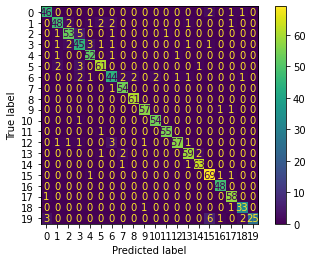

In [40]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
matrix = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
display.plot()
plt.show()



In [42]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred))


                          precision    recall  f1-score   support

             alt.atheism       0.92      0.92      0.92        50
           comp.graphics       0.89      0.84      0.86        57
 comp.os.ms-windows.misc       0.91      0.87      0.89        61
comp.sys.ibm.pc.hardware       0.79      0.82      0.80        55
   comp.sys.mac.hardware       0.90      0.95      0.92        55
          comp.windows.x       0.92      0.91      0.92        67
            misc.forsale       0.83      0.79      0.81        56
               rec.autos       0.92      0.98      0.95        55
         rec.motorcycles       0.97      1.00      0.98        61
      rec.sport.baseball       0.97      0.97      0.97        59
        rec.sport.hockey       0.96      0.98      0.97        55
               sci.crypt       0.98      0.98      0.98        56
         sci.electronics       0.97      0.88      0.92        65
                 sci.med       0.92      0.92      0.92        64
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [52]:
my_sentence = "I Like Cheetos! I think Audi is the best brand"
cleaned_sentence = pipe_line(my_sentence)
X = vectorizer.transform([cleaned_sentence])
prediction = Mod.predict(X)
print(prediction)

# 1. Apply the text pipeline to your sentence

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

# 3. Use the model to predict your new `X`. 

# 4. Print the prediction


['rec.autos']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [58]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

df.shape
df

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...


In [61]:
df.drop_duplicates
df.dropna(inplace=True)


In [64]:
df['Improved_tweet'] = df['Tweet'].apply(pipe_line)
df.head()

,Party,Handle,Tweet,Improved_tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senat dem vote savetheinternet proud sup...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,RT winterhavensun winter haven resid alta vist...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,RT nbclatino repdarrensoto note hurrican maria...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,RT nalcabpolici meet repdarrensoto thank take ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,RT vegalteno hurrican season start june 1st pu...


In [65]:
X1 = df['Improved_tweet']
y = df['Party']
X_train,X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

In [68]:
vTweets = TfidfVectorizer()
vTweets.fit(X_train)
X_train = vTweets.transform(X_train)
X_test = vTweets.transform(X_test)

In [71]:
Model = MultinomialNB(alpha=0.05)
Model.fit(X_train, y_train)

y_pred = Mod.predict(X_test)

accuracy_tweets = accuracy_score(y_test, y_pred)
print("Model Accuracy on Tweets: %f" % accuracy_tweets)

print(classification_report(y_test, y_pred))

ValueError: dimension mismatch